In [1]:
# Modelling objective: To predict if patient died as a result of Covid-19
# Classification problem
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import Covid-19 death dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/COVID-19_Case_Surveillance_Public_Use_Data.csv')

C:\Users\miche\AppData\Local\Temp\ipykernel_15760\1269672481.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/COVID-19_Case_Surveillance_Public_Use_Data.csv')


In [4]:
df

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8405074,2020/10/22,NaN,NaN,Probable Case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing
8405075,2020/10/25,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405076,2020/07/18,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405077,2020/11/19,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   pos_spec_dt                    object
 2   onset_dt                       object
 3   current_status                 object
 4   sex                            object
 5   age_group                      object
 6   Race and ethnicity (combined)  object
 7   hosp_yn                        object
 8   icu_yn                         object
 9   death_yn                       object
 10  medcond_yn                     object
dtypes: object(11)
memory usage: 705.4+ MB


In [6]:
# Descriptive  of dataset, all are categorical variables
df.describe().transpose()

,count,unique,top,freq
cdc_report_dt,8405079,321,2020/06/24,155857
pos_spec_dt,2870789,313,2020/11/09,50595
onset_dt,4395957,338,2020/11/02,49527
current_status,8405079,2,Laboratory-confirmed case,7910118
sex,8405061,5,Female,4340898
age_group,8404990,10,20 - 29 Years,1635264
Race and ethnicity (combined),8405072,9,Unknown,2781176
hosp_yn,8405079,4,No,3502556
icu_yn,8405079,4,Missing,6178281
death_yn,8405079,4,No,3690813


In [7]:
# to check for missing variables
# pos_spec_dt: Date of 1st positive specimen collection
# onset_dt: When is the onset date
df.isnull().sum()

cdc_report_dt                          0
pos_spec_dt                      5534290
onset_dt                         4009122
current_status                         0
sex                                   18
age_group                             89
Race and ethnicity (combined)          7
hosp_yn                                0
icu_yn                                 0
death_yn                               0
medcond_yn                             0
dtype: int64

In [8]:
# to remove unimportant variables from dataset
df = df.drop(['pos_spec_dt','onset_dt'], axis=1)

In [9]:
# to remove missing values from sex, age_group, ethnicity, missing values are small
df = df.dropna()

In [10]:
# check that there are no missing values in dataset 
df.isnull().sum()

cdc_report_dt                    0
current_status                   0
sex                              0
age_group                        0
Race and ethnicity (combined)    0
hosp_yn                          0
icu_yn                           0
death_yn                         0
medcond_yn                       0
dtype: int64

In [11]:
# dataset is imbalanced, with Negative cases outweighing the positive cases
df['death_yn'].value_counts()

death_yn
No         3690765
Missing    3486890
Unknown    1043765
Yes         183570
Name: count, dtype: int64

In [12]:
# to convert all 'Missing' variables in 'death_yn' into 'Unknown' using .replace
df['death_yn'] = df['death_yn'].replace('Missing', 'Unknown')

In [13]:
df['death_yn'].value_counts()

death_yn
Unknown    4530655
No         3690765
Yes         183570
Name: count, dtype: int64

In [14]:
# to print diagnosed Covid-19 date cases columns
df['cdc_report_dt']

0          2020/11/10
1          2020/11/14
2          2020/11/19
3          2020/11/14
4          2020/11/13
              ...    
8405074    2020/10/22
8405075    2020/10/25
8405076    2020/07/18
8405077    2020/11/19
8405078    2020/11/03
Name: cdc_report_dt, Length: 8404990, dtype: object

In [15]:
# to covert cdc report column into date time format for further data processing
df['cdc_report_dt'] = pd.to_datetime(df['cdc_report_dt'])

In [16]:
# to separate the date of cdc into 2 columns (Year, Month)
df['Year'] = df['cdc_report_dt'].dt.year
df['Month'] = df['cdc_report_dt'].dt.month

In [17]:
# to check the dataframe for newly created columns
df.head()

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,Year,Month
0,2020-11-10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No,2020,11
1,2020-11-14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,11
2,2020-11-19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,11
3,2020-11-14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing,2020,11
4,2020-11-13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,2020,11


In [18]:
# to remove the cdc report date column as relevant information has been extracted
df = df.drop('cdc_report_dt', axis=1)

In [19]:
# to get the month name from numbers in Python, 'Month' column
import calendar 
from datetime import datetime

In [20]:
# to convert digits in 'Month' to Month name, using lambda
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])

In [21]:
# to check dataframe again
df.head()

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,Year,Month
0,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No,2020,November
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,November
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,November
3,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing,2020,November
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,2020,November


In [22]:
df['sex'].unique()

array(['Male', 'Unknown', 'Missing', 'Female', 'Other'], dtype=object)

In [23]:
# to convert all 'Missing' variables in 'sex' into 'Unknown'
df['sex'] = df['sex'].replace('Missing', 'Unknown')

In [24]:
df['sex'].value_counts()

sex
Female     4340898
Male       3970591
Unknown      93346
Other          155
Name: count, dtype: int64

In [25]:
df['Race and ethnicity (combined)'].value_counts()

Race and ethnicity (combined)
Unknown                                                 2781165
White, Non-Hispanic                                     2599402
Hispanic/Latino                                         1195726
Black, Non-Hispanic                                      736570
Missing                                                  601519
Multiple/Other, Non-Hispanic                             270503
Asian, Non-Hispanic                                      143067
American Indian/Alaska Native, Non-Hispanic               59842
Native Hawaiian/Other Pacific Islander, Non-Hispanic      17196
Name: count, dtype: int64

In [26]:
# to convert all Missing variables in 'Race' into Unknown
df['Race and ethnicity (combined)'] = df['Race and ethnicity (combined)'].replace('Missing', 'Unknown')

In [27]:
df['Race and ethnicity (combined)'].value_counts()

Race and ethnicity (combined)
Unknown                                                 3382684
White, Non-Hispanic                                     2599402
Hispanic/Latino                                         1195726
Black, Non-Hispanic                                      736570
Multiple/Other, Non-Hispanic                             270503
Asian, Non-Hispanic                                      143067
American Indian/Alaska Native, Non-Hispanic               59842
Native Hawaiian/Other Pacific Islander, Non-Hispanic      17196
Name: count, dtype: int64

In [28]:
df['hosp_yn'].value_counts()

hosp_yn
No         3502508
Missing    3227280
Unknown    1136446
Yes         538756
Name: count, dtype: int64

In [29]:
# to replace all Missing variables in 'hosp_yn' into Unknown
df['hosp_yn'] = df['hosp_yn'].replace('Missing', 'Unknown')

In [30]:
df['hosp_yn'].value_counts()

hosp_yn
Unknown    4363726
No         3502508
Yes         538756
Name: count, dtype: int64

In [31]:
df['icu_yn'].value_counts()

icu_yn
Missing    6178240
Unknown    1286223
No          879642
Yes          60885
Name: count, dtype: int64

In [32]:
# to replace all Missing variables in 'hosp_yn' into Unknown
df['icu_yn'] = df['icu_yn'].replace('Missing', 'Unknown')

In [33]:
df['icu_yn'].value_counts()

icu_yn
Unknown    7464463
No          879642
Yes          60885
Name: count, dtype: int64

In [34]:
df['medcond_yn'].value_counts()

medcond_yn
Missing    6063360
Unknown     838014
Yes         785216
No          718400
Name: count, dtype: int64

In [35]:
# to replace all Missing variables in 'medcond_yn' into Unknown
df['medcond_yn'] = df['medcond_yn'].replace('Missing', 'Unknown')

In [36]:
df['medcond_yn'].value_counts()

medcond_yn
Unknown    6901374
Yes         785216
No          718400
Name: count, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8404990 entries, 0 to 8405078
Data columns (total 10 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   current_status                 object
 1   sex                            object
 2   age_group                      object
 3   Race and ethnicity (combined)  object
 4   hosp_yn                        object
 5   icu_yn                         object
 6   death_yn                       object
 7   medcond_yn                     object
 8   Year                           int32 
 9   Month                          object
dtypes: int32(1), object(9)
memory usage: 673.3+ MB


In [38]:
df['Month'].value_counts()

Month
November     1720774
October      1460003
July         1079629
August        991092
September     989488
June          880120
May           582192
April         538947
March         161476
February        1037
January          232
Name: count, dtype: int64

In [39]:
# Year of Covid-19 cases = 2020
df['Year'].value_counts()

Year
2020    8404990
Name: count, dtype: int64

In [40]:
# to check categories in 'age_group' variable
df['age_group'].value_counts()

age_group
20 - 29 Years    1635264
30 - 39 Years    1372623
40 - 49 Years    1267350
50 - 59 Years    1227493
60 - 69 Years     863260
10 - 19 Years     841450
70 - 79 Years     483689
80+ Years         382869
0 - 9 Years       299040
Unknown            31952
Name: count, dtype: int64

In [41]:
# After converting all 'Missing' variables to 'Unknown', to drop all rows with Unknown values in dataframe
# https://stackoverflow.com/questions/44211248/i-want-to-remove-all-rows-which-turn-out-the-result-unknown-for-a-certain-colu
df = df[df['Race and ethnicity (combined)'] != 'Unknown']
df = df[df['death_yn'] != 'Unknown']
df = df[df['hosp_yn'] != 'Unknown']
df = df[df['icu_yn']!= 'Unknown']
df = df[df['medcond_yn']!= 'Unknown']
df = df[df['sex'] != 'Unknown']
df = df[df['age_group'] != 'Unknown']

In [42]:
# after removing 'Unknown'
df['age_group'].value_counts()

age_group
20 - 29 Years    79676
50 - 59 Years    69653
30 - 39 Years    66258
40 - 49 Years    65798
60 - 69 Years    55541
10 - 19 Years    44218
70 - 79 Years    35232
80+ Years        26972
0 - 9 Years      14431
Name: count, dtype: int64

In [43]:
# after removing 'Unknown'
df['death_yn'].value_counts()

death_yn
No     428610
Yes     29169
Name: count, dtype: int64

In [44]:
df.head()

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,Year,Month
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,November
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,November
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,2020,November
11,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,November
14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,2020,November


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457779 entries, 1 to 8404559
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   current_status                 457779 non-null  object
 1   sex                            457779 non-null  object
 2   age_group                      457779 non-null  object
 3   Race and ethnicity (combined)  457779 non-null  object
 4   hosp_yn                        457779 non-null  object
 5   icu_yn                         457779 non-null  object
 6   death_yn                       457779 non-null  object
 7   medcond_yn                     457779 non-null  object
 8   Year                           457779 non-null  int32 
 9   Month                          457779 non-null  object
dtypes: int32(1), object(9)
memory usage: 36.7+ MB


In [46]:
# there are no missing values in dataset befor Exploratory data analysis
df.isnull().sum()

current_status                   0
sex                              0
age_group                        0
Race and ethnicity (combined)    0
hosp_yn                          0
icu_yn                           0
death_yn                         0
medcond_yn                       0
Year                             0
Month                            0
dtype: int64

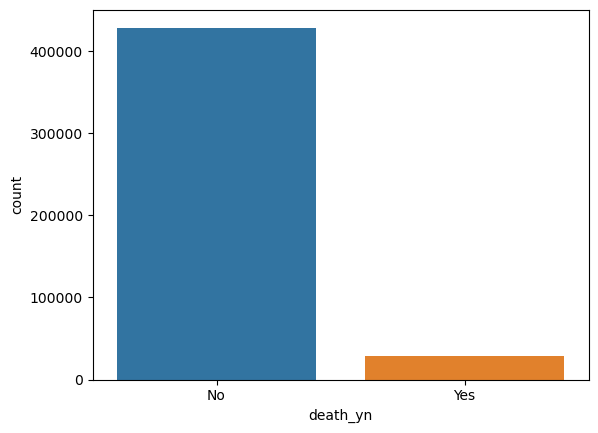

In [47]:
# target variable 'death_yn'
sns.countplot(data=df, x='death_yn')
plt.show()

In [48]:
df['death_yn'].value_counts()

death_yn
No     428610
Yes     29169
Name: count, dtype: int64

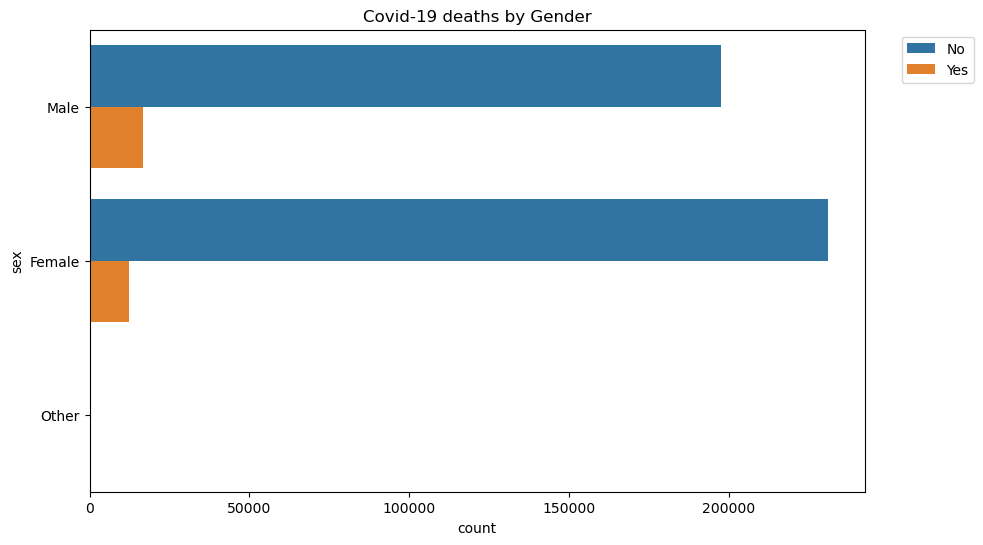

In [49]:
# Cases from Covid-19 deaths are mostly Males
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, y='sex', hue='death_yn')
plt.legend(bbox_to_anchor=(1.15, 1.0))
plt.title('Covid-19 deaths by Gender')
plt.show()

In [50]:
# Fatalities = more Males
pd.DataFrame(df.groupby(['sex','death_yn'])['death_yn'].count())

death_yn
sex    death_yn          
Female No          231012
       Yes          12396
Male   No          197550
       Yes          16773
Other  No              48

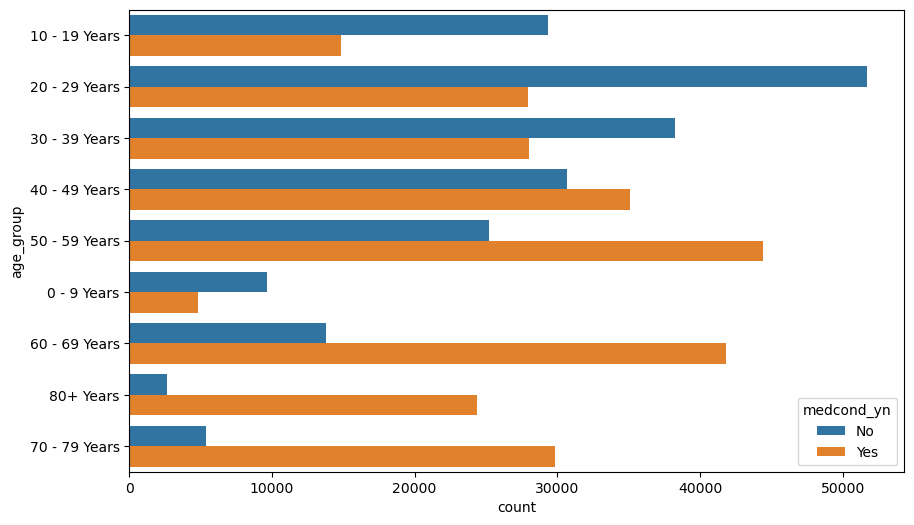

In [51]:
plt.figure(figsize=(10,6),dpi=100)
sns.countplot(data=df, y='age_group', hue='medcond_yn')
plt.show()

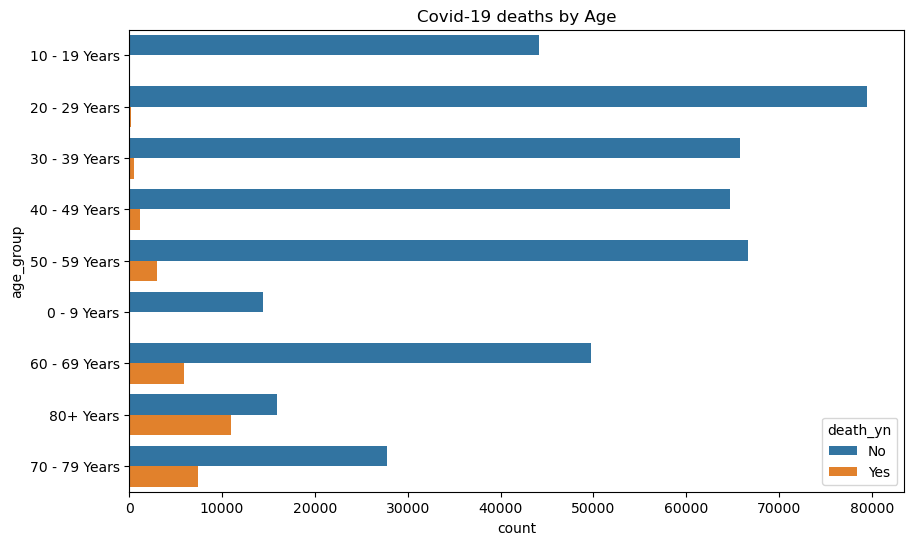

In [52]:
plt.figure(figsize=(10,6),dpi=100)
sns.countplot(data=df, y='age_group', hue='death_yn')
plt.title('Covid-19 deaths by Age')
plt.show()

In [53]:
# the older you are, the more fatal Covid-19 is, from 60 years onwards
pd.DataFrame(df.groupby(['age_group','death_yn'])['death_yn'].count())

death_yn
age_group     death_yn          
0 - 9 Years   No           14412
              Yes             19
10 - 19 Years No           44174
              Yes             44
20 - 29 Years No           79501
              Yes            175
30 - 39 Years No           65792
              Yes            466
40 - 49 Years No           64660
              Yes           1138
50 - 59 Years No           66618
              Yes           3035
60 - 69 Years No           49686
              Yes           5855
70 - 79 Years No           27805
              Yes           7427
80+ Years     No           15962
              Yes          11010

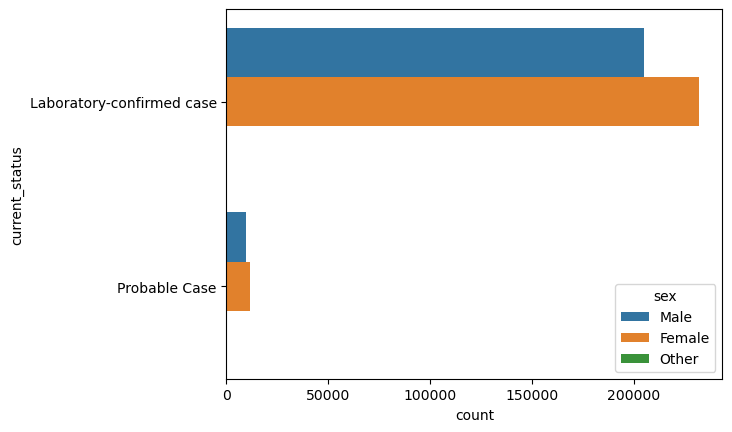

In [54]:
# more Females are Laboratory confirmed cases for Covid-19
sns.countplot(data=df, y='current_status', hue='sex')
plt.show()

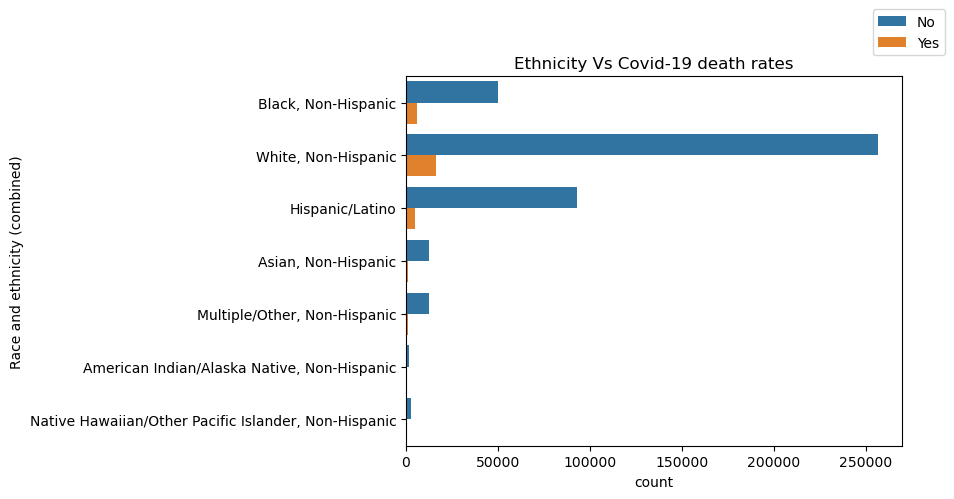

In [55]:
# Highest mortalities rates from White(Non-hispanic),Black(Non-Hispanic), Hispanic/Latino 
sns.countplot(data=df, y='Race and ethnicity (combined)', hue ='death_yn')
plt.legend(bbox_to_anchor=(1.1,1.2))
plt.title('Ethnicity Vs Covid-19 death rates')
plt.show()

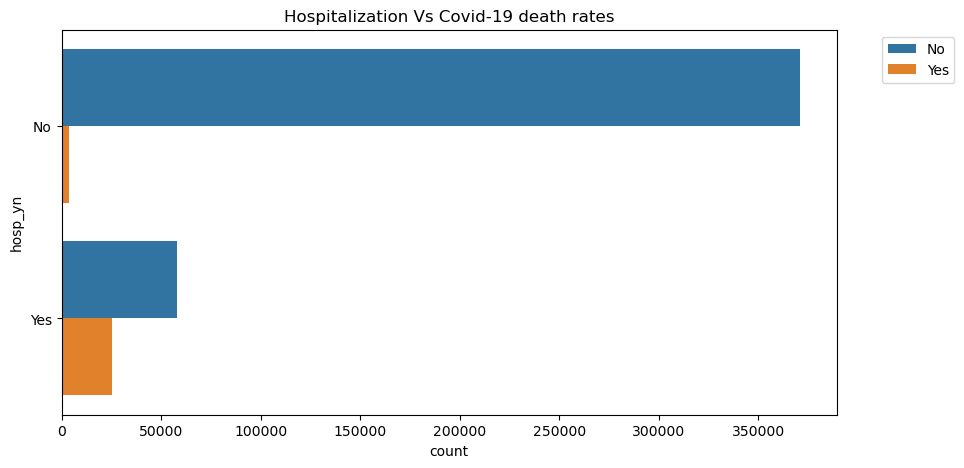

In [56]:
# more cases of Covid-19 death rates are associated with being Hospitalised
plt.figure(figsize=(10,5),dpi=100)
sns.countplot(data=df, y='hosp_yn', hue ='death_yn')
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.title('Hospitalization Vs Covid-19 death rates')
plt.show()

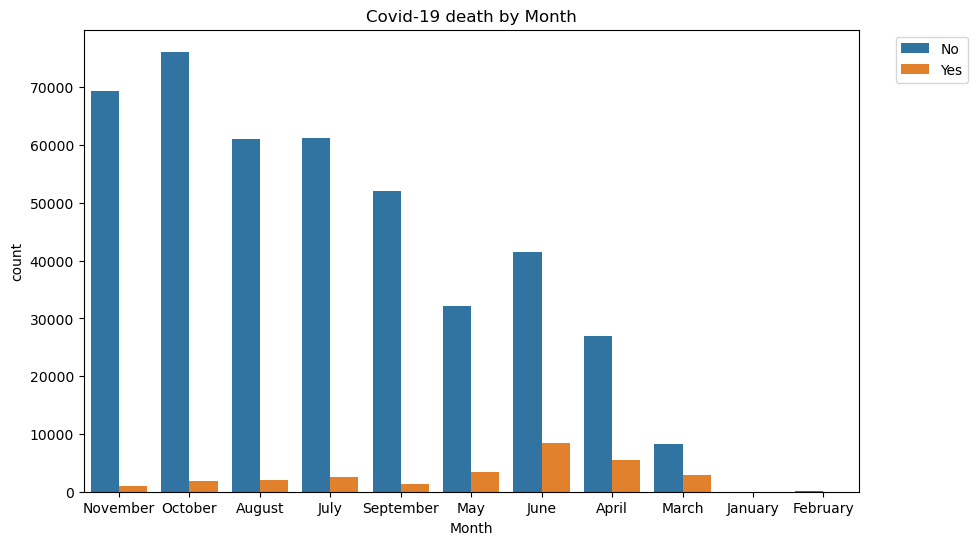

In [57]:
plt.figure(figsize=(10,6),dpi=100)
sns.countplot(data=df, x='Month', hue ='death_yn')
plt.legend(bbox_to_anchor=(1.15,1.0))
plt.title('Covid-19 death by Month')
plt.show()

In [58]:
# More Covid-19 deaths were observed in May, June, April and Mar
pd.DataFrame(df.groupby(['Month','death_yn'])['death_yn'].count())

death_yn
Month     death_yn          
April     No           26916
          Yes           5574
August    No           60987
          Yes           2057
February  No              54
          Yes             16
January   No              16
July      No           61244
          Yes           2524
June      No           41503
          Yes           8381
March     No            8306
          Yes           2925
May       No           32144
          Yes           3374
November  No           69305
          Yes           1023
October   No           76160
          Yes           1900
September No           51975
          Yes           1395

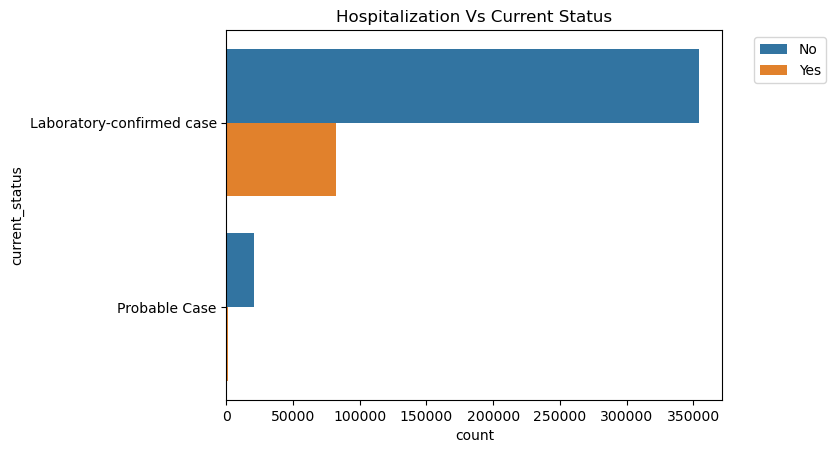

In [59]:
sns.countplot(data=df, y='current_status', hue='hosp_yn')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Hospitalization Vs Current Status')
plt.show()

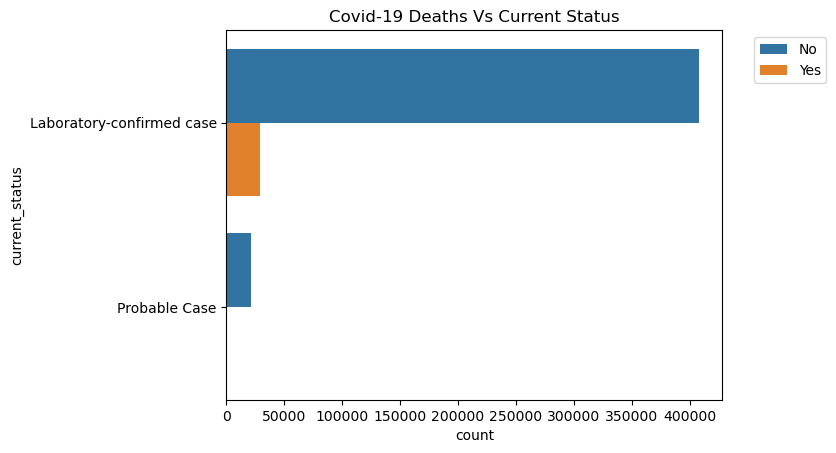

In [60]:
# More Covid-19 death cases are associated with Lab confirmed cases
sns.countplot(data=df, y='current_status', hue='death_yn')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Covid-19 Deaths Vs Current Status')
plt.show()

In [61]:
## predictive modelling
df.head()

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,Year,Month
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,November
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,November
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,2020,November
11,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,November
14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,2020,November


In [62]:
# to define X and y
X = df.drop('death_yn', axis=1)

In [63]:
# to convert all categorical variables in dummy variables before machine learning
X = pd.get_dummies(X, drop_first=True)

In [64]:
# to double check if dummy variables has been created
X

,Year,current_status_Probable Case,sex_Male,sex_Other,age_group_10 - 19 Years,age_group_20 - 29 Years,age_group_30 - 39 Years,age_group_40 - 49 Years,age_group_50 - 59 Years,age_group_60 - 69 Years,...,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
1,2020,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2020,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2020,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
11,2020,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
14,2020,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8404296,2020,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8404365,2020,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
8404392,2020,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
8404461,2020,True,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [65]:
y = df['death_yn']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
# testing set = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()

In [70]:
scaled_X_train = scaler.fit_transform(X_train)

In [71]:
scaled_X_test = scaler.transform(X_test)

In [72]:
# to overcome Class Imbalance using SMOTE technique for target variable 'death_yn'
from imblearn.over_sampling import SMOTE

In [73]:
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions y_train dataset:  (320445,)
Number transactions y_test dataset:  (137334,)


In [74]:
# to Oversample 'death-yn' in y_train set
print("Before OverSampling, counts of label 'Yes': {}".format(sum(y_train=="Yes")))
print("Before OverSampling, counts of label 'No': {} \n".format(sum(y_train=="No")))

sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(scaled_X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_res=="Yes")))
print("After OverSampling, counts of label 'No': {}".format(sum(y_train_res=="No")))

Before OverSampling, counts of label 'Yes': 20359
Before OverSampling, counts of label 'No': 300086 

After OverSampling, the shape of train_X: (600172, 31)
After OverSampling, the shape of train_y: (600172,) 

After OverSampling, counts of label 'Yes': 300086
After OverSampling, counts of label 'No': 300086


In [75]:
# to import logistic Regression
from sklearn.linear_model import LogisticRegression

In [76]:
log_model = LogisticRegression()

In [77]:
# to fit the logistic regression into the training data
log_model.fit(X_train_res, y_train_res)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
# to do logistic regression on the X test data
log_pred = log_model.predict(scaled_X_test)

In [79]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [80]:
print(confusion_matrix(y_test,log_pred))
print('\n')
# Logistic regression model has achieved 90% accuracy
print(classification_report(y_test,log_pred)) 

[[115861  12663]
 [   653   8157]]


              precision    recall  f1-score   support

          No       0.99      0.90      0.95    128524
         Yes       0.39      0.93      0.55      8810

    accuracy                           0.90    137334
   macro avg       0.69      0.91      0.75    137334
weighted avg       0.96      0.90      0.92    137334



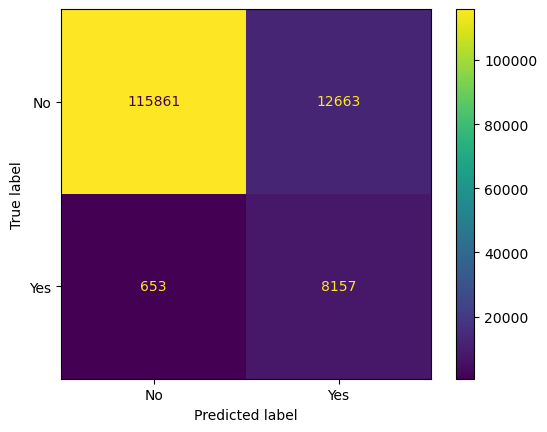

In [81]:
ConfusionMatrixDisplay.from_predictions(y_test,log_pred)

In [82]:
# to import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [83]:
dt = DecisionTreeClassifier()

In [84]:
# to fit the decision tree model to training data
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [85]:
# decision tree prediction
dt_pred = dt.predict(scaled_X_test)

In [86]:
# Decision tree prediction model has achieved 91% accuracy
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test, dt_pred))

[[116546  11978]
 [   843   7967]]


              precision    recall  f1-score   support

          No       0.99      0.91      0.95    128524
         Yes       0.40      0.90      0.55      8810

    accuracy                           0.91    137334
   macro avg       0.70      0.91      0.75    137334
weighted avg       0.95      0.91      0.92    137334



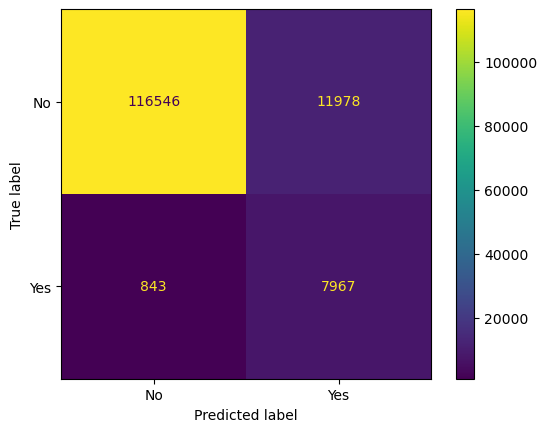

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test,dt_pred)

In [88]:
# to import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [89]:
rfc = RandomForestClassifier()

In [90]:
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [91]:
# to train random forest prediction model from training data
rfc_pred = rfc.predict(scaled_X_test)

In [92]:
rfc_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [93]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred)) # Random Forest prediction model has achieved 91% accuracy

[[116503  12021]
 [   806   8004]]


              precision    recall  f1-score   support

          No       0.99      0.91      0.95    128524
         Yes       0.40      0.91      0.56      8810

    accuracy                           0.91    137334
   macro avg       0.70      0.91      0.75    137334
weighted avg       0.96      0.91      0.92    137334



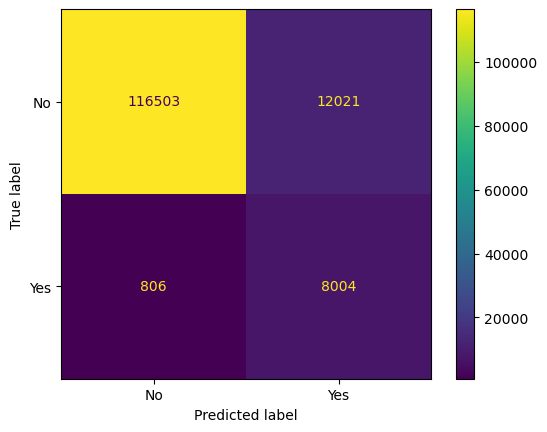

In [94]:
ConfusionMatrixDisplay.from_predictions(y_test,rfc_pred)

In [95]:
# to print the feature importance from the Random forest model
rfc.feature_importances_

array([0.00000000e+00, 3.69268138e-03, 1.15477632e-02, 8.59857345e-06,
       9.67334646e-03, 3.25330646e-02, 2.26666632e-02, 1.44391684e-02,
       1.06705686e-02, 1.26838835e-02, 3.14982205e-02, 1.36429080e-01,
       1.46052154e-03, 3.09510157e-03, 4.31506778e-03, 1.87797513e-03,
       9.67566214e-04, 6.31856190e-03, 3.43070079e-01, 1.71019522e-01,
       1.07311357e-01, 5.68118893e-03, 7.36541566e-05, 1.18198727e-05,
       5.70286389e-03, 1.73223995e-02, 6.18135601e-03, 6.27198956e-03,
       1.60737923e-02, 1.12546938e-02, 6.14745124e-03])

In [96]:
pd.DataFrame(index= X.columns, data=rfc.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
Year,0.000000
sex_Other,0.000009
Month_January,0.000012
Month_February,0.000074
"Race and ethnicity (combined)_Native Hawaiian/Other Pacific Islander, Non-Hispanic",0.000968
"Race and ethnicity (combined)_Asian, Non-Hispanic",0.001461
"Race and ethnicity (combined)_Multiple/Other, Non-Hispanic",0.001878
"Race and ethnicity (combined)_Black, Non-Hispanic",0.003095
current_status_Probable Case,0.003693
Race and ethnicity (combined)_Hispanic/Latino,0.004315


In [97]:
# to read into a new dataframe
rf_feat =pd.DataFrame(index= X.columns, data=rfc.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance')

In [98]:
# to remove variables who features are less than 0.005
rf_feat = rf_feat[rf_feat['Feature Importance'] > 0.005]

In [99]:
rf_feat

,Feature Importance
Month_August,0.005681
Month_July,0.005703
Month_September,0.006147
Month_March,0.006181
Month_May,0.006272
"Race and ethnicity (combined)_White, Non-Hispanic",0.006319
age_group_10 - 19 Years,0.009673
age_group_50 - 59 Years,0.010671
Month_October,0.011255
sex_Male,0.011548


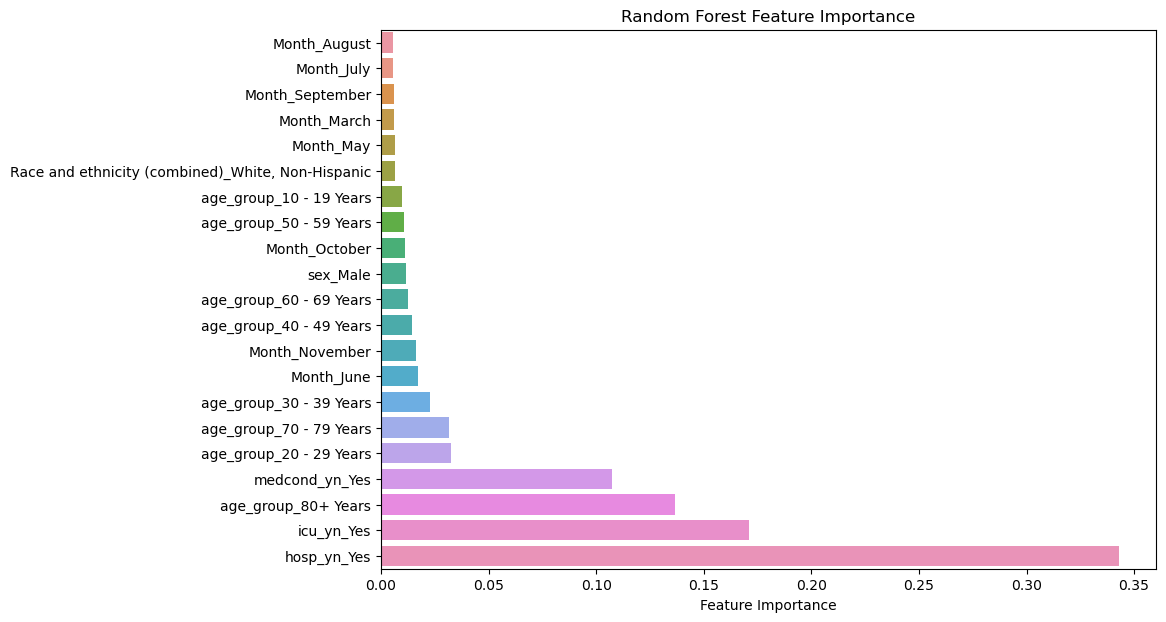

In [100]:
# to visualise Random Forest variable important by barplot, Highest Accuracy 91%
# Random Forest predictors: icu_yn_Yes, Hosp_yn_Yes,age_80 years, medcond_yes, age_70-79
plt.figure(figsize=(10,7), dpi=100)
sns.barplot(data=rf_feat, y=rf_feat.index, x='Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [106]:
# to import boosting algorithms
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
# to build the Gradient Boosting classifier model
gb_model = GradientBoostingClassifier()

In [108]:
# to fit the Gradient boosting model to training resampled data
gb_model.fit(X_train_res, y_train_res)

GradientBoostingClassifier()

In [109]:
# to predict on the X test data
gb_pred = gb_model.predict(scaled_X_test)

In [110]:
print(confusion_matrix(y_test,gb_pred))
print('\n')
print(classification_report(y_test,gb_pred)) # Gradient Boosting model has achieved 89% accuracy

[[114625  13899]
 [   547   8263]]


              precision    recall  f1-score   support

          No       1.00      0.89      0.94    128524
         Yes       0.37      0.94      0.53      8810

    accuracy                           0.89    137334
   macro avg       0.68      0.91      0.74    137334
weighted avg       0.96      0.89      0.91    137334

